In [14]:
import json
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import plotly as pt

## Import data

In [15]:
BENCHMARK_DIR = "data/benchmark/"
GRID_SIZE_LIST = [
    "2x2",
    "3x3",
    "4x4",
    "5x5",
    "6x6"
]
result_dict = dict()

In [16]:
def read_benchmark_data(benchmark_name):
    benchmark_filename = f"benchmark-{benchmark_name}.json"
    benchmark_filepath = os.path.join(BENCHMARK_DIR, benchmark_filename)
    with open(benchmark_filepath, "r") as f:
        return json.load(f)

for benchmark_name in GRID_SIZE_LIST:
    result_dict[benchmark_name] = read_benchmark_data(benchmark_name)

In [22]:
time_list = []
for grid_size in GRID_SIZE_LIST:
    for grid in result_dict[grid_size]["results"]:
        command = grid["command"]
        grid_id = int(command[24:25])
        for time in grid["times"]:
            row = dict()
            row["grid_size"] = grid_size
            row["grid_id"] = grid_id
            row["time"] = time
            time_list.append(row)

In [24]:
bench_df = pd.DataFrame(time_list)
bench_df

,grid_size,grid_id,time
0,2x2,1,0.001377
1,2x2,1,0.001217
2,2x2,1,0.001316
3,2x2,1,0.001883
4,2x2,1,0.001542
...,...,...,...
14842,6x6,9,0.292740
14843,6x6,9,0.284181
14844,6x6,9,0.292437
14845,6x6,9,0.293367


In [25]:
bench_df.to_csv("data/benchmark/benchmark.csv", index=False)

## Analyze data

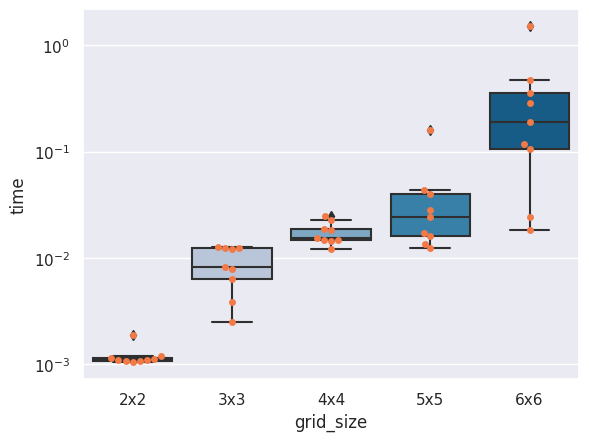

In [73]:
data = bench_df.groupby(["grid_size", "grid_id"]).mean().reset_index()
sns.set_theme(style="darkgrid")
grid = sns.boxplot(
    x="grid_size",
    y="time",
    # hue="grid_id",
    palette="PuBu",
    data=data
)
grid.set(yscale="log")

sns.swarmplot(
    x="grid_size",
    y="time",
    # hue="grid_id",
    data=data,
    color="#f27a47",
)
grid.set(yscale="log")

plt.savefig("images/boxplot-time-size.png")

In [71]:
df = bench_df.groupby(["grid_size"]).agg(["mean","median", "std", "min", "max"]).drop(columns=["grid_id"])
df[[("time", "mean"), ("time", "median"), ("time", "std"), ("time", "min"), ("time", "max")]]*1000 # en ms

time                                               
                 mean     median         std        min          max
grid_size                                                           
2x2          1.189935   1.038935    1.082216   0.751029    32.798632
3x3          7.149053   6.536044    4.383013   0.694219    40.057198
4x4         16.627480  15.103171    4.555540  10.152792    56.724898
5x5         22.925644  16.528124   20.662463   9.769217   173.132353
6x6        118.763430  22.948149  268.589507  16.113656  1542.144311

In [74]:
bench_df.groupby(["grid_size"]).count()

,grid_id,time
grid_size,,
2x2,9077,9077
3x3,3038,3038
4x4,1398,1398
5x5,1002,1002
6x6,332,332
